# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
test = weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

units = "metric"
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 2 of Set 1 | west island
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | enewetak
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | aasiaat
Processing Record 8 of Set 1 | russkaya polyana
Processing Record 9 of Set 1 | sisimiut
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | atafu village
Processing Record 12 of Set 1 | yuzhno-kurilsk
Processing Record 13 of Set 1 | bukama
Processing Record 14 of Set 1 | rasshevatskaya
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | labasa
Processing Record 17 of Set 1 | toamasina
Processing Record 18 of Set 1 | mili
Processing Record 19 of Set 1 | iskateley
Processing Record 20 of Set 1 | huaicheng
Processing Record 21 of Set 1 | lhokseumawe
Processing Record 22 of Set 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bocana de paiwas,12.7857,-85.1227,25.24,91,100,4.42,NI,1722553963
1,chos malal,-37.3781,-70.2709,11.43,45,100,7.23,AR,1722553964
2,arica,-18.4750,-70.3042,18.75,77,0,3.09,CL,1722553609
3,haiku-pauwela,20.9219,-156.3051,28.98,62,0,10.29,US,1722553966
4,gornozavodsk,58.3758,58.3211,12.43,98,99,1.04,RU,1722553968


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")


In [14]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bocana de paiwas,12.7857,-85.1227,25.24,91,100,4.42,NI,1722553963
1,chos malal,-37.3781,-70.2709,11.43,45,100,7.23,AR,1722553964
2,arica,-18.4750,-70.3042,18.75,77,0,3.09,CL,1722553609
3,haiku-pauwela,20.9219,-156.3051,28.98,62,0,10.29,US,1722553966
4,gornozavodsk,58.3758,58.3211,12.43,98,99,1.04,RU,1722553968


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

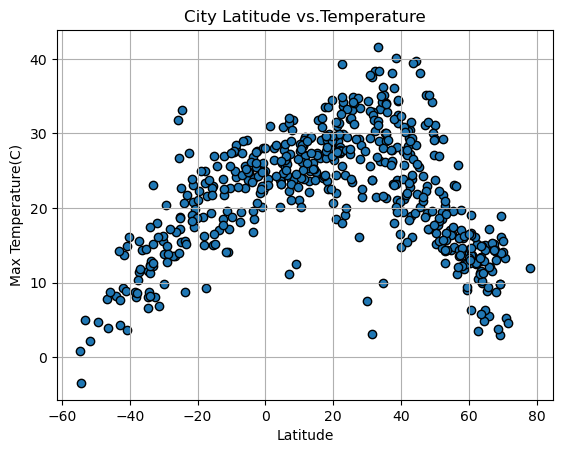

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Latitude vs.Temperature')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

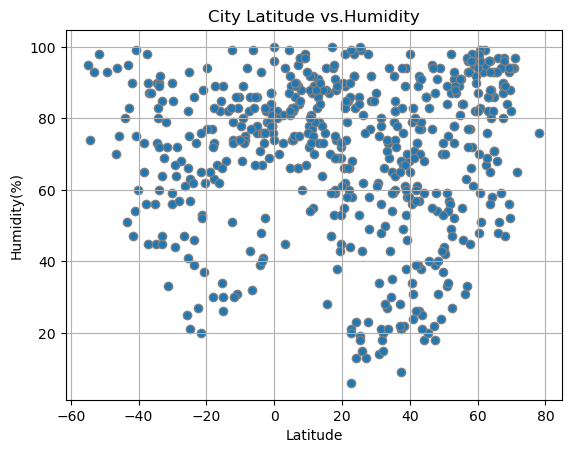

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='grey')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs.Humidity')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

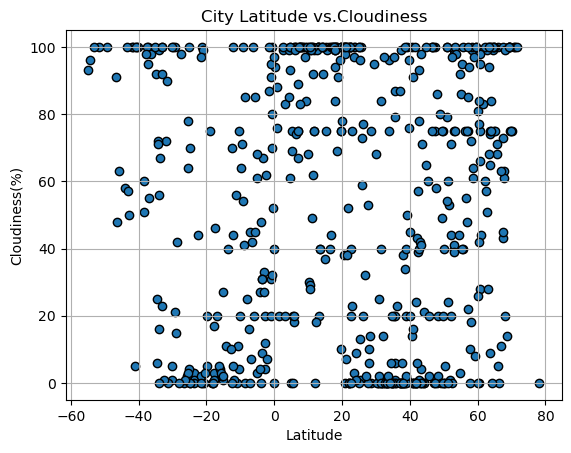

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs.Cloudiness')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

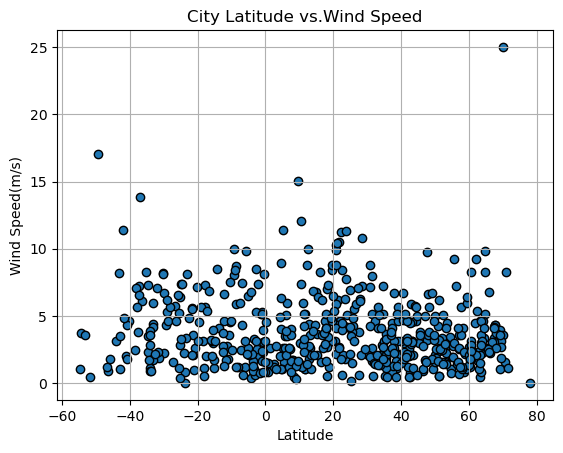

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Latitude vs.Wind Speed')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
       
    #Plot the line
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(correlation[0],2)}")

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bocana de paiwas,12.7857,-85.1227,25.24,91,100,4.42,NI,1722553963
3,haiku-pauwela,20.9219,-156.3051,28.98,62,0,10.29,US,1722553966
4,gornozavodsk,58.3758,58.3211,12.43,98,99,1.04,RU,1722553968
9,isafjordur,66.0755,-23.1240,5.60,97,100,6.74,IS,1722553973
11,sardinata,8.0829,-72.8007,31.82,60,100,1.70,CO,1722553976


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,chos malal,-37.3781,-70.2709,11.43,45,100,7.23,AR,1722553964
2,arica,-18.4750,-70.3042,18.75,77,0,3.09,CL,1722553609
5,port lincoln,-34.7333,135.8667,11.61,45,92,7.33,AU,1722553969
6,ushuaia,-54.8000,-68.3000,0.87,95,93,1.02,AR,1722553970
7,grytviken,-54.2811,-36.5092,-3.43,74,96,3.74,GS,1722553971


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is -0.61


Text(0, 0.5, 'Temp(C)')

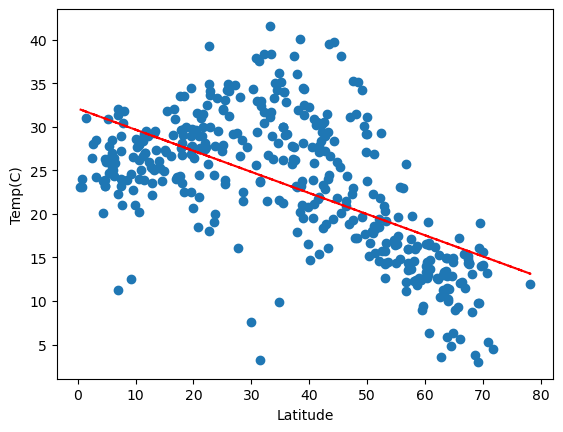

In [33]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(10, -10))
plt.xlabel('Latitude')
plt.ylabel('Temp(C)')

The r-value between Lat and Max Temp is 0.8


Text(0, 0.5, 'Temp(C)')

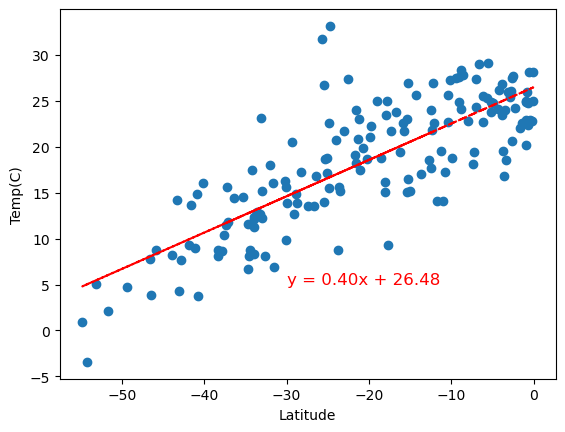

In [34]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-30, 5))
plt.xlabel('Latitude')
plt.ylabel('Temp(C)')

The main relationship for the southern hemisphere and the northern hemispere is that the closer you get to the 0 degrees or the equator the higher the temp gets. 

### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.0


Text(0, 0.5, 'Humidity(%)')

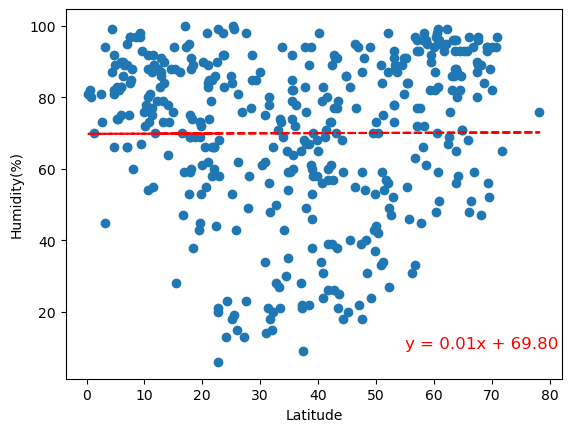

In [35]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(55, 10))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

The r-value between Lat and Humidity is -0.01


Text(0, 0.5, 'Humidity(%)')

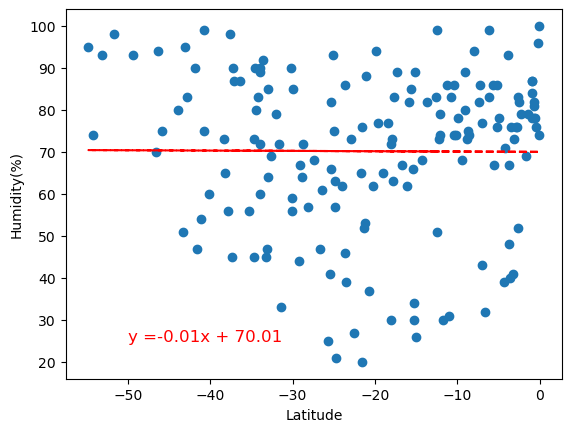

In [36]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-50, 25))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

It is very difficult to see a relationship that exists to the humidity vs the latitude. It seems to be shattered randomly based on the location and the humidity can very. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Lat and Cloudiness is -0.11


Text(0, 0.5, 'Cloudiness(%)')

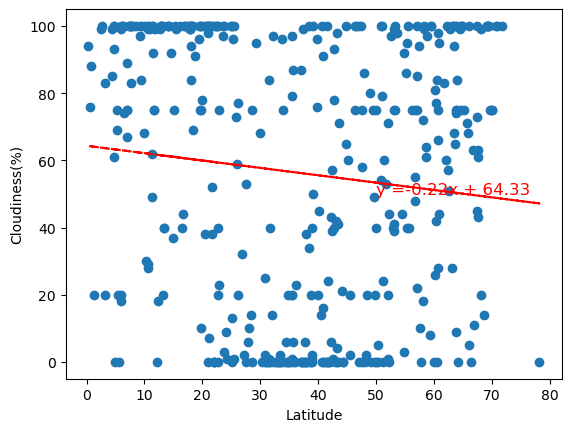

In [37]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(50, 50))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

The r-value between Lat and Cloudiness is -0.31


Text(0, 0.5, 'Cloudiness(%)')

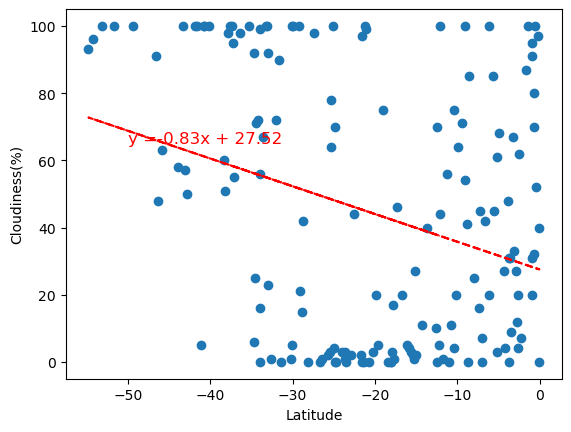

In [38]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-50, 65))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

The same with the cloudiness. There doesn't seem to be a relationship that exist due to the location of latitude. I would assume this is due to the land masses vs the water masses.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value between Lat and Wind Speed is -0.08


Text(0, 0.5, 'Wind Speed(m/s)')

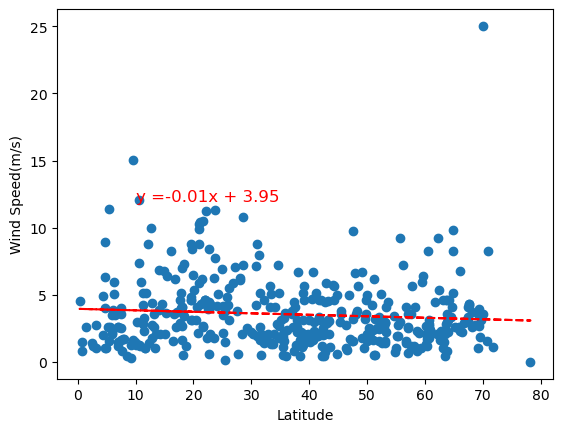

In [39]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(10, 12))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

The r-value between Lat and Wind Speed is -0.11


Text(0, 0.5, 'Wind Speed(m/s)')

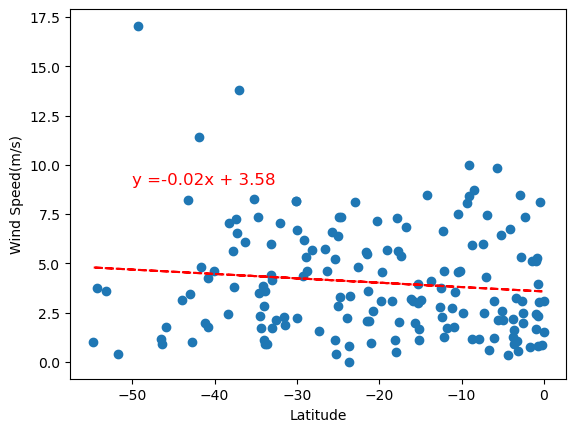

In [40]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(-50, 9))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

The wind speeds are averaged across all latitudes of the northern and southern hemispheres. But was it interesting is that there are a few outlyiers of greater speeds the further you get from 0 degrees or the equator.